# Exercise1

In [14]:
#install.packages("e1071")
library("e1071")

Warning message:
"package 'e1071' was built under R version 3.6.3"

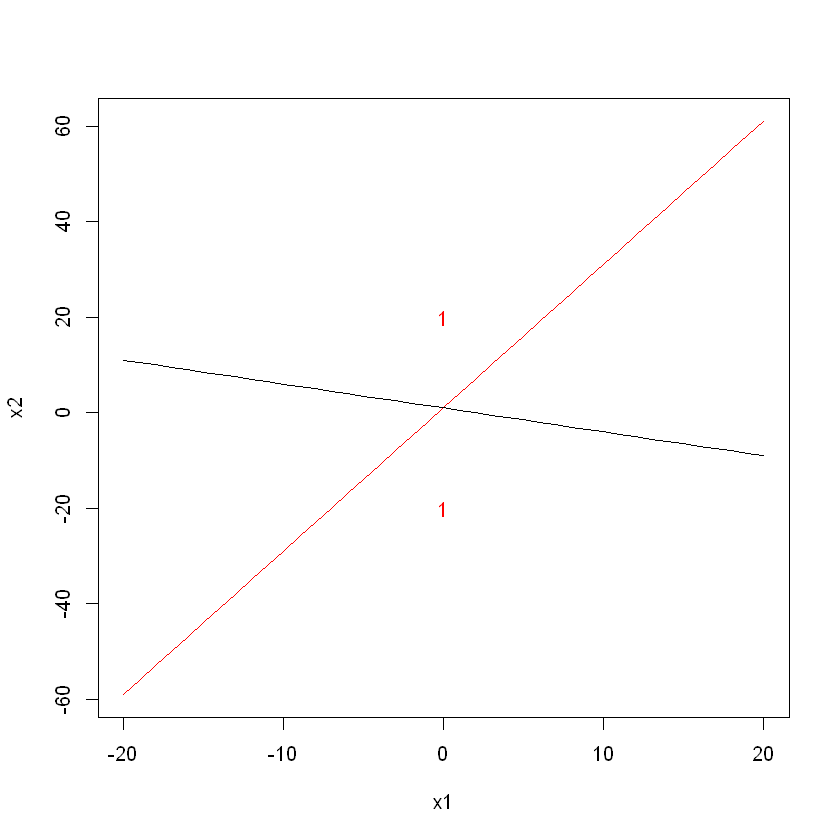

In [58]:
x1 = -20:20
x2 = 1 + 3 * x1
plot(x1, x2, type = "l", col = "red")
text(c(0), c(-20), col = "red")
text(c(0), c(20),  col = "red")
lines(x1, 1 - x1/2)


###   points above the red line larger than 0 and points below red line less than 0
###   points above the black line larger than 0 and points below blue line less than 0

# Exercise2

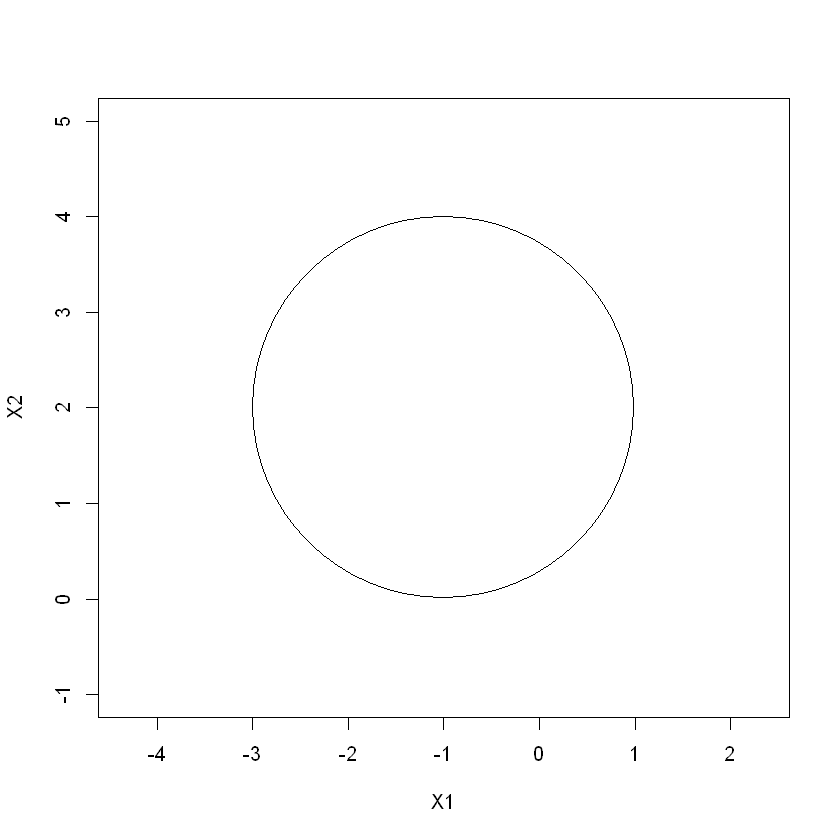

In [54]:
radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)

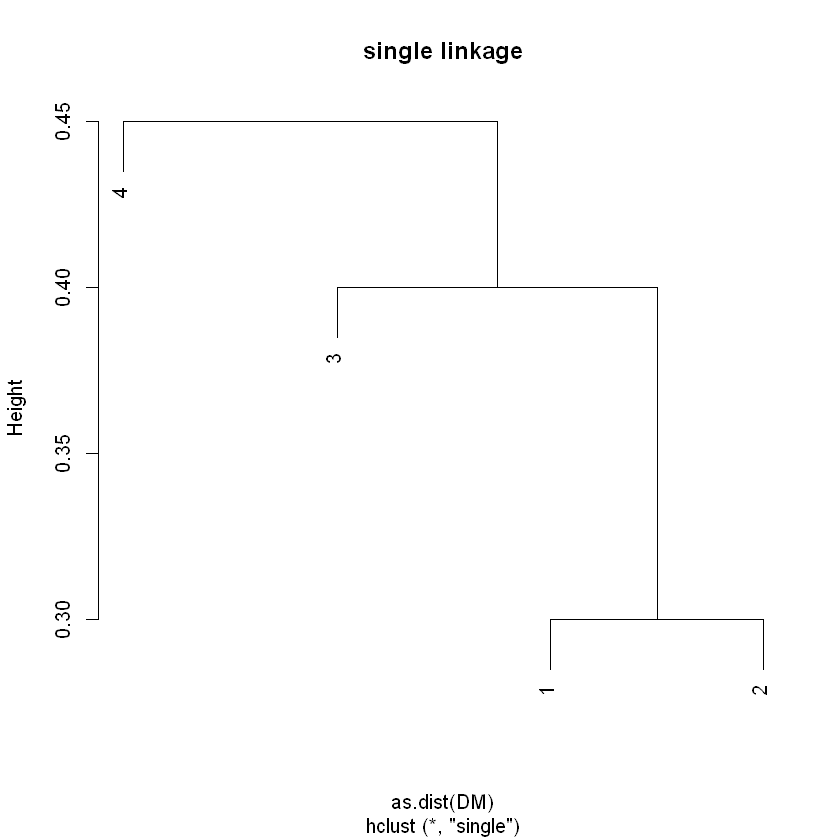

In [2]:
plot(hclust(as.dist(DM), method = "single"), main = "single linkage")

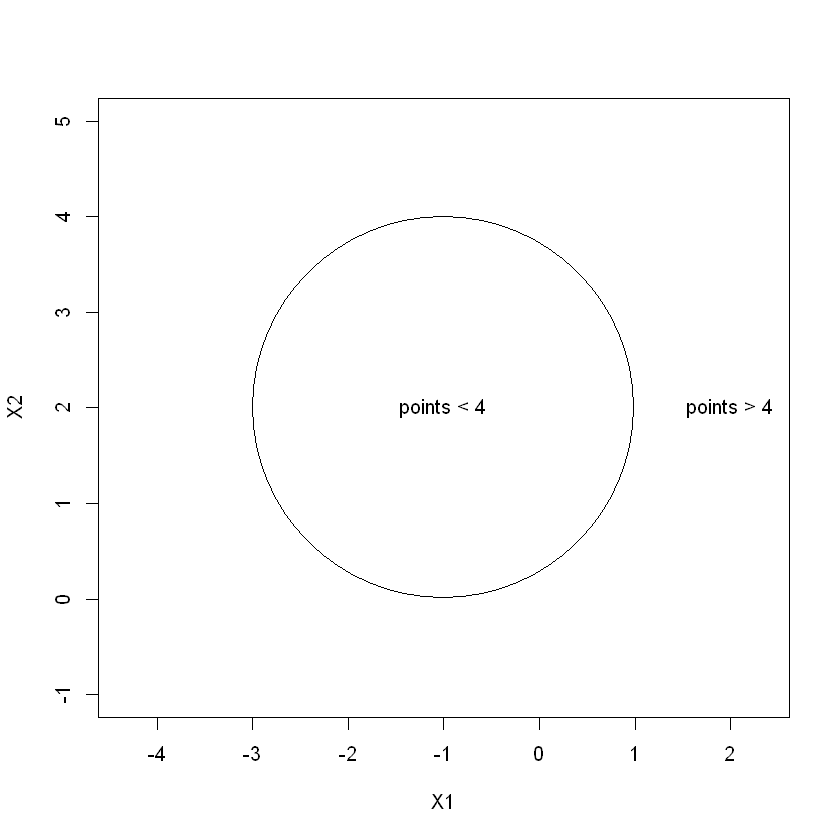

In [55]:
radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)
text(c(-1), c(2), "points < 4")
text(c(2), c(2), "points > 4")

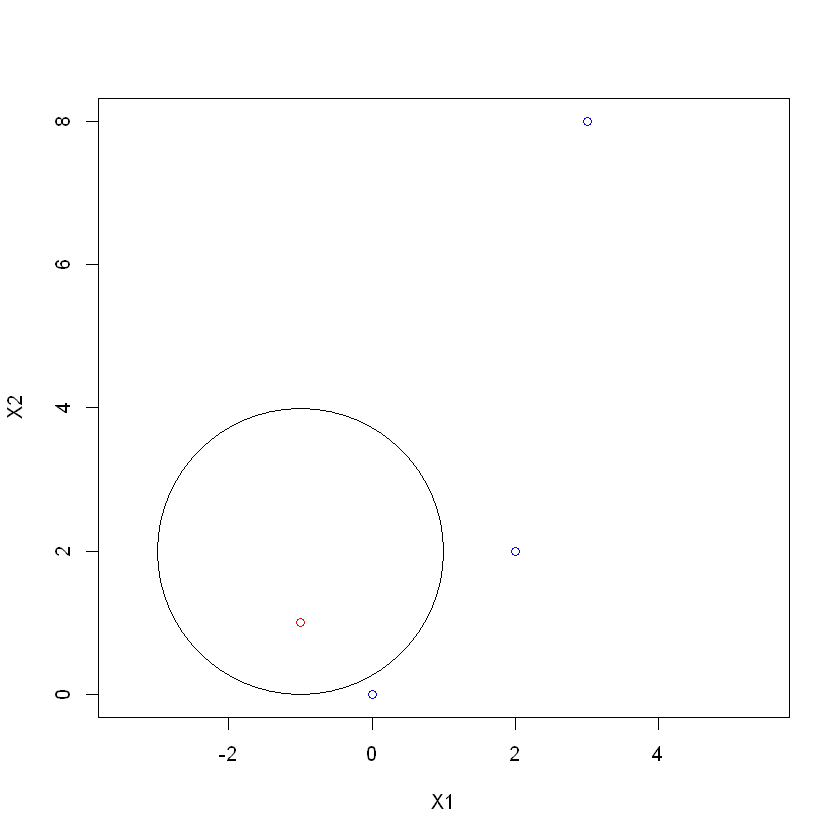

In [56]:
radius = 2
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)

# Exercise4

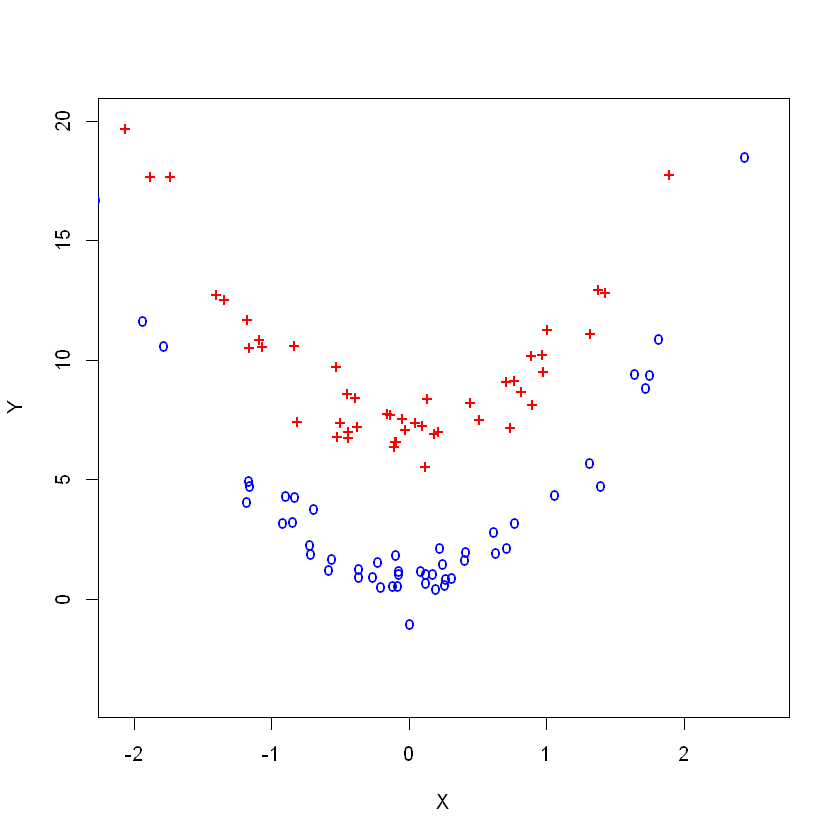

In [45]:
# Generate some data
set.seed(100)
x = rnorm(100)
y = 3 * x^2 + 4 + rnorm(100)
train = sample(100, 50)
y[train] = y[train] + 3
y[-train] = y[-train] - 3
# Plot using different colors
plot(x[train], y[train], pch="+", lwd=4, col="red", ylim=c(-4, 20), xlab="X", ylab="Y")
points(x[-train], y[-train], pch="o", lwd=4, col="blue")

In [46]:
library("class")

Warning message:
"package 'class' was built under R version 3.6.3"

In [47]:
set.seed(100)
z = rep(0, 100)
z[train] = 1
# Take 25 observations each from train and -train
final.train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=x[final.train], y=y[final.train], z=as.factor(z[final.train]))
data.test = data.frame(x=x[-final.train], y=y[-final.train], z=as.factor(z[-final.train]))
library(e1071)

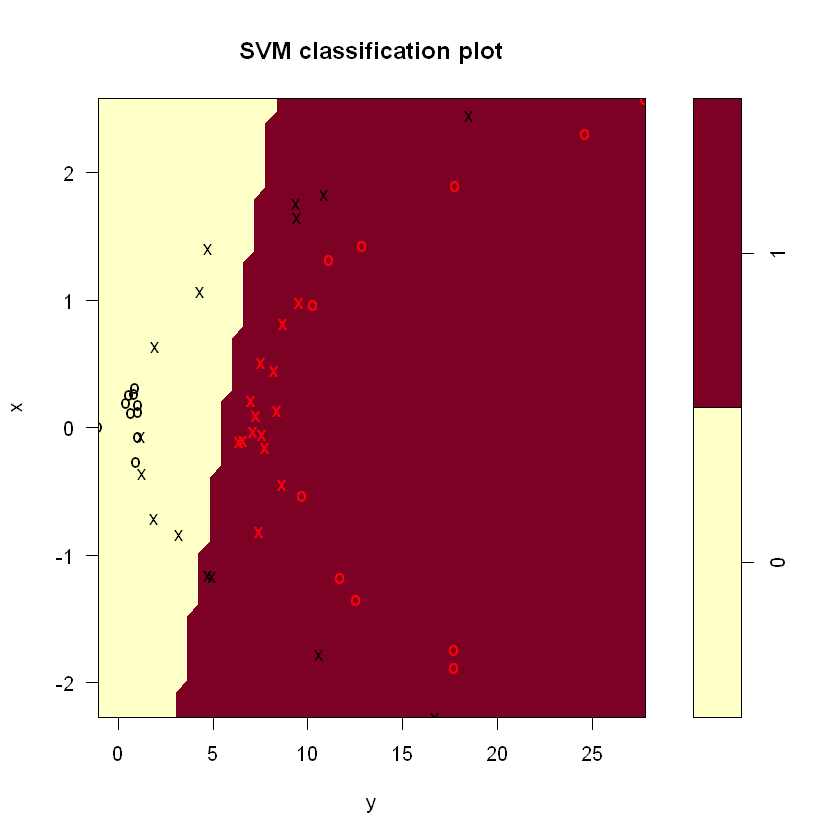

In [48]:
svm.linear = svm(z~., data=data.train, kernel="linear", cost=10)
plot(svm.linear, data.train)


In [49]:
table(z[final.train], predict(svm.linear, data.train))

   
     0  1
  0 17  8
  1  0 25

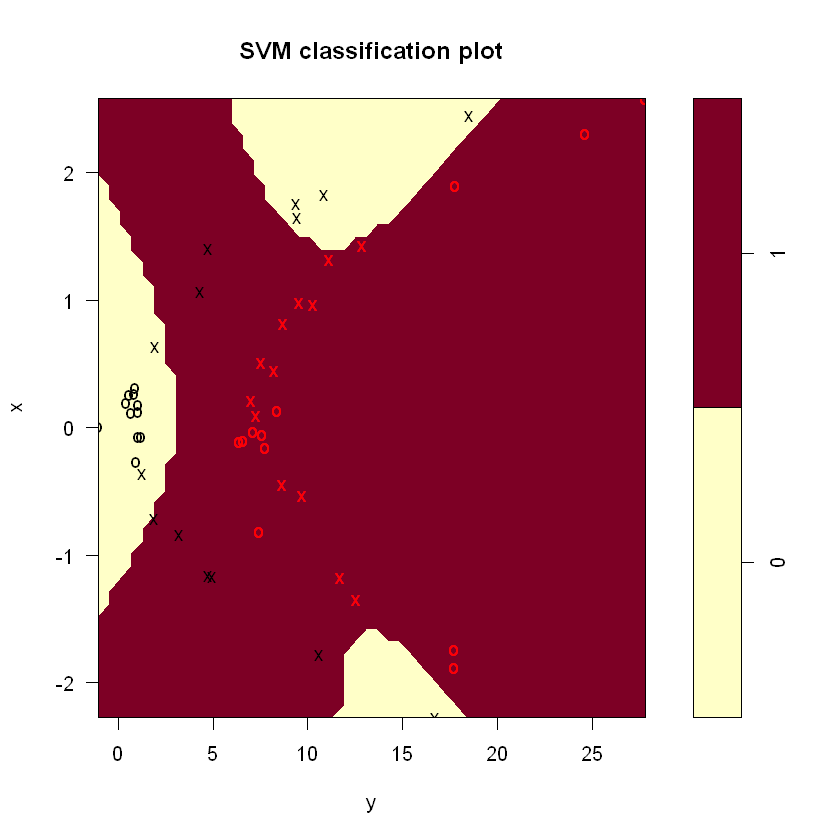

In [50]:
set.seed(1000)
svm.poly = svm(z~., data=data.train, kernel="polynomial", cost=10)
plot(svm.poly, data.train)

In [51]:
table(z[final.train], predict(svm.poly, data.train))

   
     0  1
  0 18  7
  1  0 25

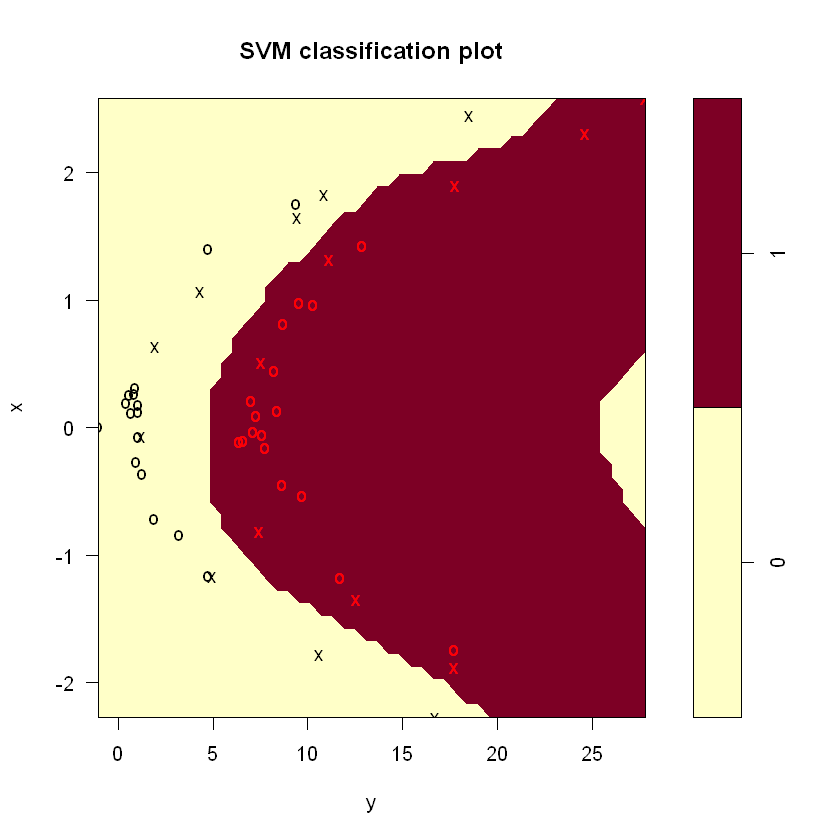

In [52]:
set.seed(500)
svm.radial = svm(z~., data=data.train, kernel="radial", gamma=1, cost=10)
plot(svm.radial, data.train)

In [53]:
table(z[final.train], predict(svm.radial, data.train))

   
     0  1
  0 25  0
  1  0 25

# Exercise7

In [36]:
library(ISLR)
library(e1071)
gas.med = median(Auto$mpg)
new.var = ifelse(Auto$mpg > gas.med, 1, 0)
Auto$mpglevel = as.factor(new.var)

In [38]:
set.seed(3255)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01269231 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07397436 0.06863413
2 1e-01 0.05102564 0.06923024
3 1e+00 0.01269231 0.02154160
4 5e+00 0.01519231 0.01760469
5 1e+01 0.02025641 0.02303772
6 1e+02 0.03294872 0.02898463


In [39]:
set.seed(20)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.1, 
    1, 5, 10), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
   10      2

- best performance: 0.5435897 

- Detailed performance results:
   cost degree     error dispersion
1   0.1      2 0.5587821 0.04538579
2   1.0      2 0.5587821 0.04538579
3   5.0      2 0.5587821 0.04538579
4  10.0      2 0.5435897 0.05611162
5   0.1      3 0.5587821 0.04538579
6   1.0      3 0.5587821 0.04538579
7   5.0      3 0.5587821 0.04538579
8  10.0      3 0.5587821 0.04538579
9   0.1      4 0.5587821 0.04538579
10  1.0      4 0.5587821 0.04538579
11  5.0      4 0.5587821 0.04538579
12 10.0      4 0.5587821 0.04538579


In [40]:
set.seed(100)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.1, 
    1, 5, 10), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10  0.01

- best performance: 0.02551282 

- Detailed performance results:
   cost gamma      error dispersion
1   0.1 1e-02 0.09429487 0.04814900
2   1.0 1e-02 0.07897436 0.03875105
3   5.0 1e-02 0.05352564 0.02532795
4  10.0 1e-02 0.02551282 0.02417610
5   0.1 1e-01 0.07891026 0.03847631
6   1.0 1e-01 0.05602564 0.02881876
7   5.0 1e-01 0.03826923 0.03252085
8  10.0 1e-01 0.03320513 0.02964746
9   0.1 1e+00 0.57660256 0.05479863
10  1.0 1e+00 0.06628205 0.02996211
11  5.0 1e+00 0.06115385 0.02733573
12 10.0 1e+00 0.06115385 0.02733573
13  0.1 5e+00 0.57660256 0.05479863
14  1.0 5e+00 0.51538462 0.06642516
15  5.0 5e+00 0.50775641 0.07152757
16 10.0 5e+00 0.50775641 0.07152757
17  0.1 1e+01 0.57660256 0.05479863
18  1.0 1e+01 0.53833333 0.05640443
19  5.0 1e+01 0.53070513 0.05708644
20 10.0 1e+01 0.53070513 0.05708644
21  0.1 1e+02 0.57660256 0.05479863
22  1.0 1e+02 0.57660256

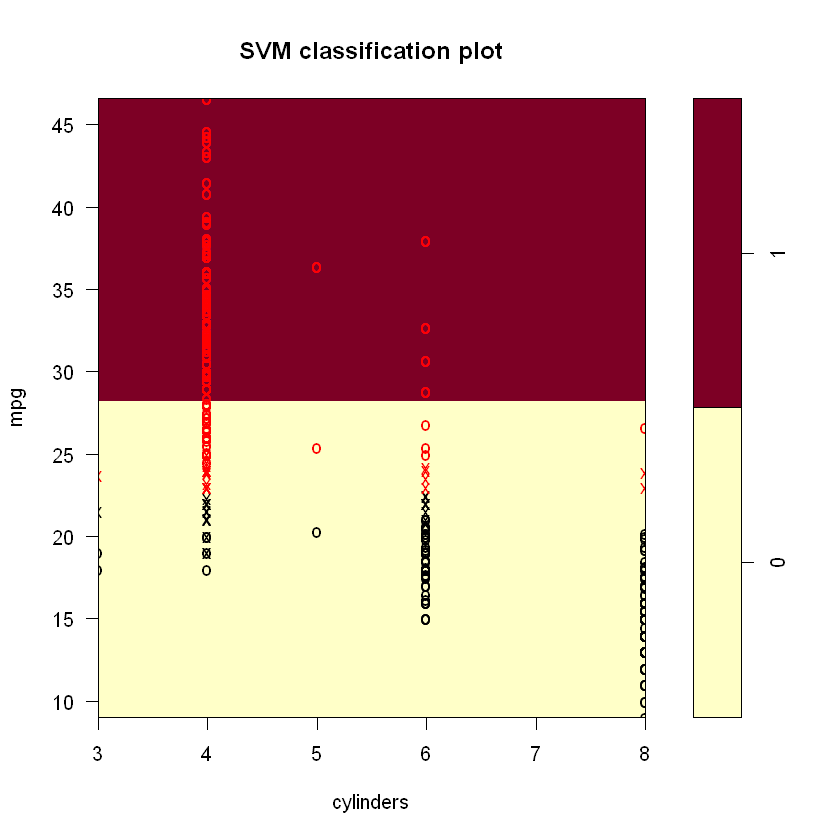

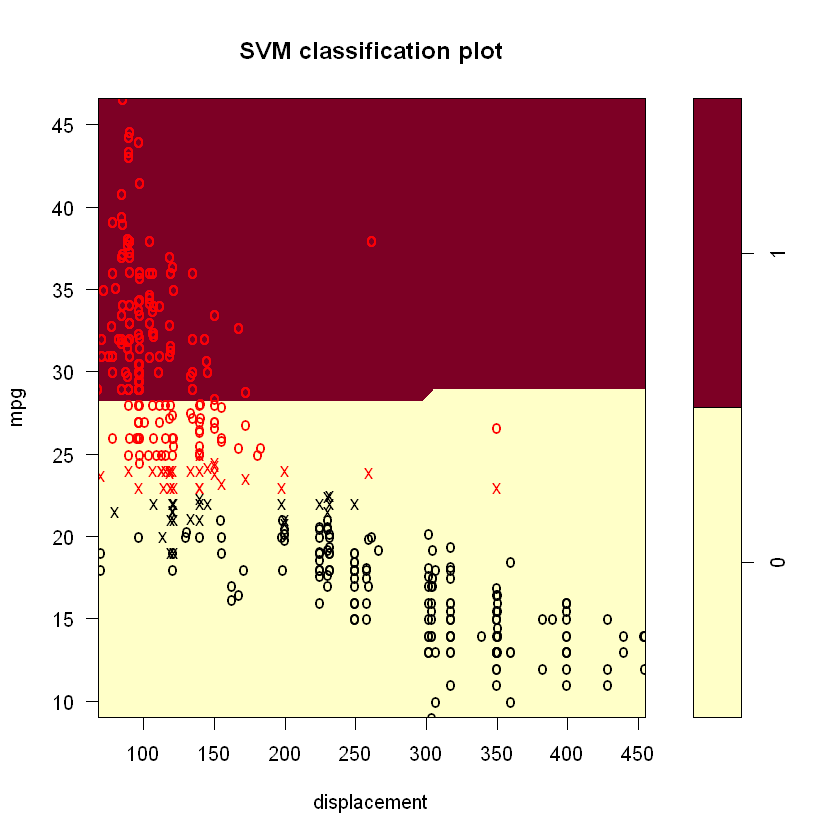

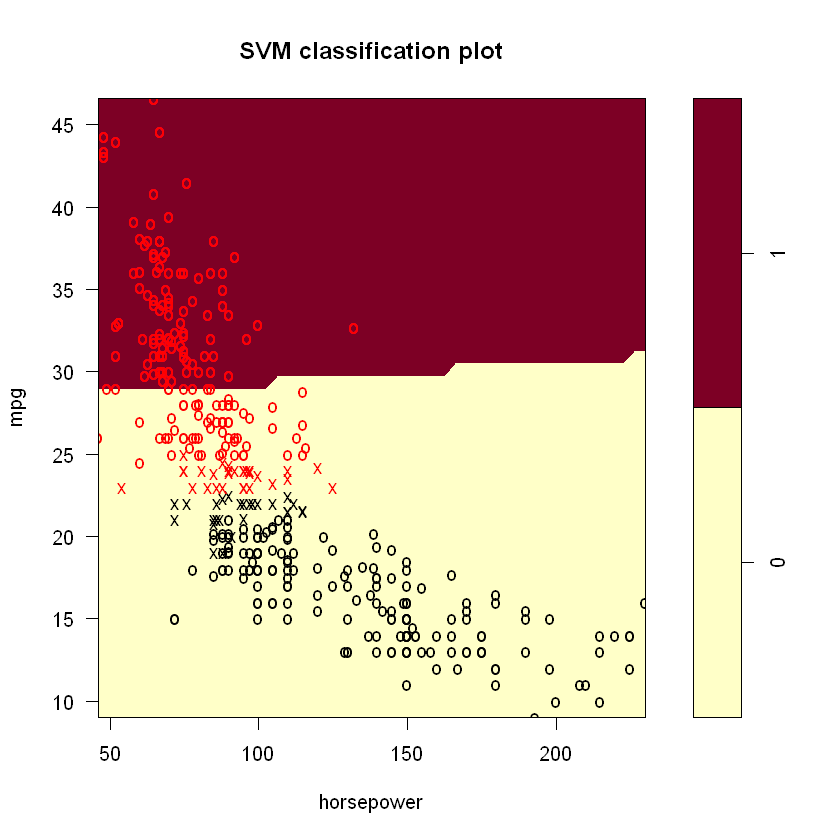

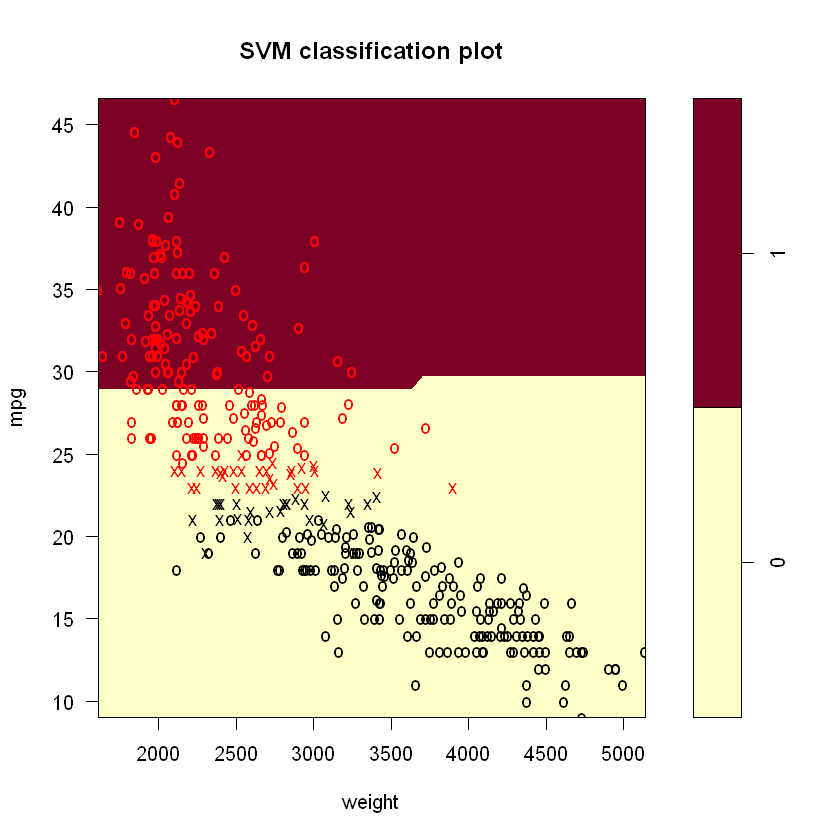

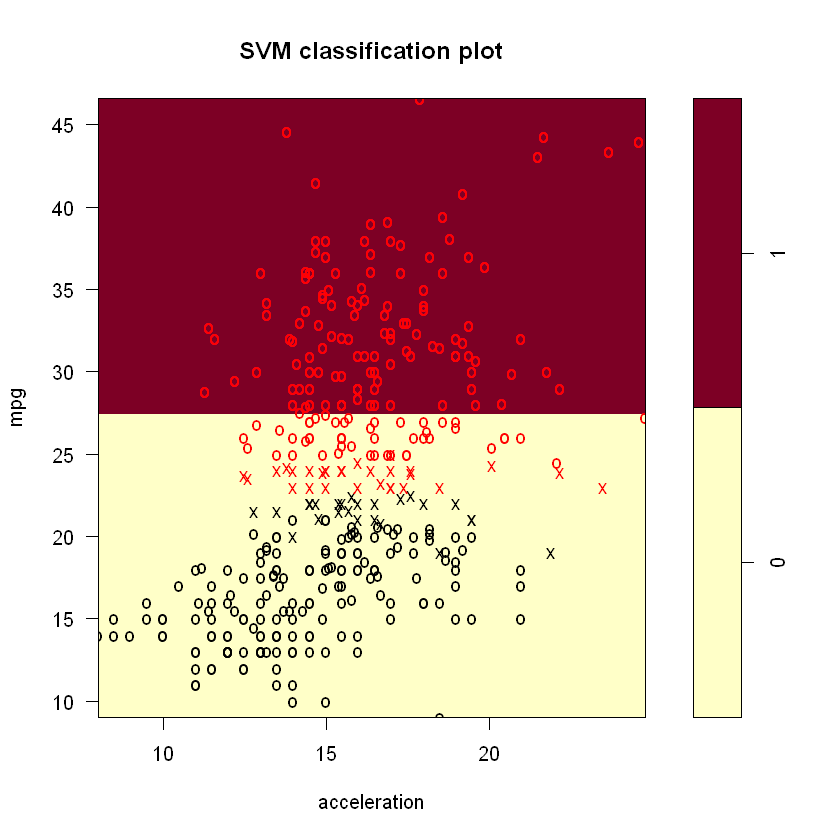

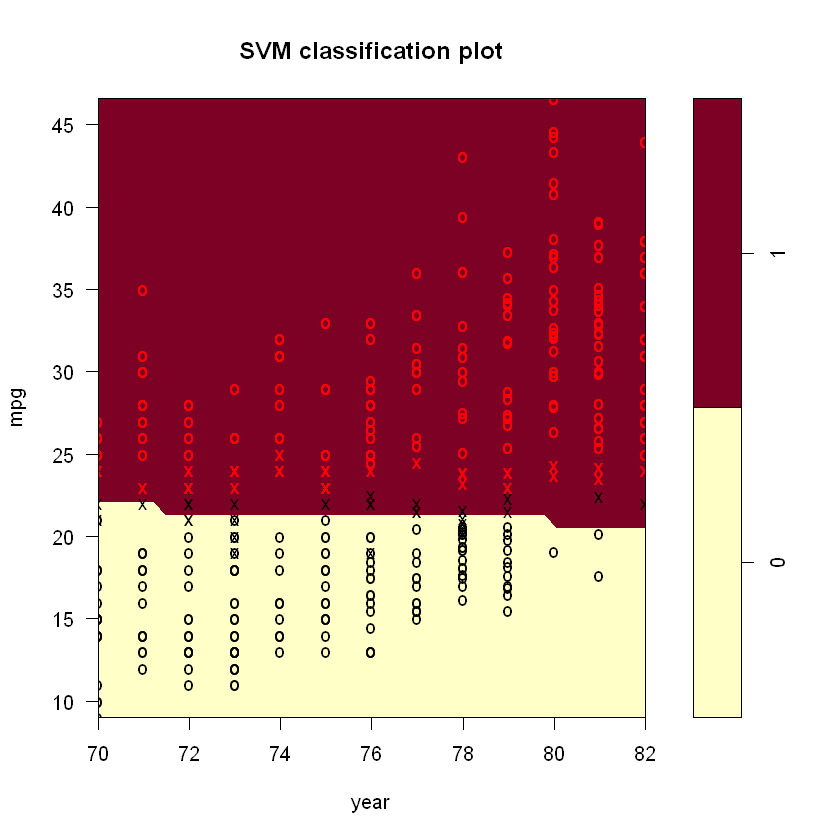

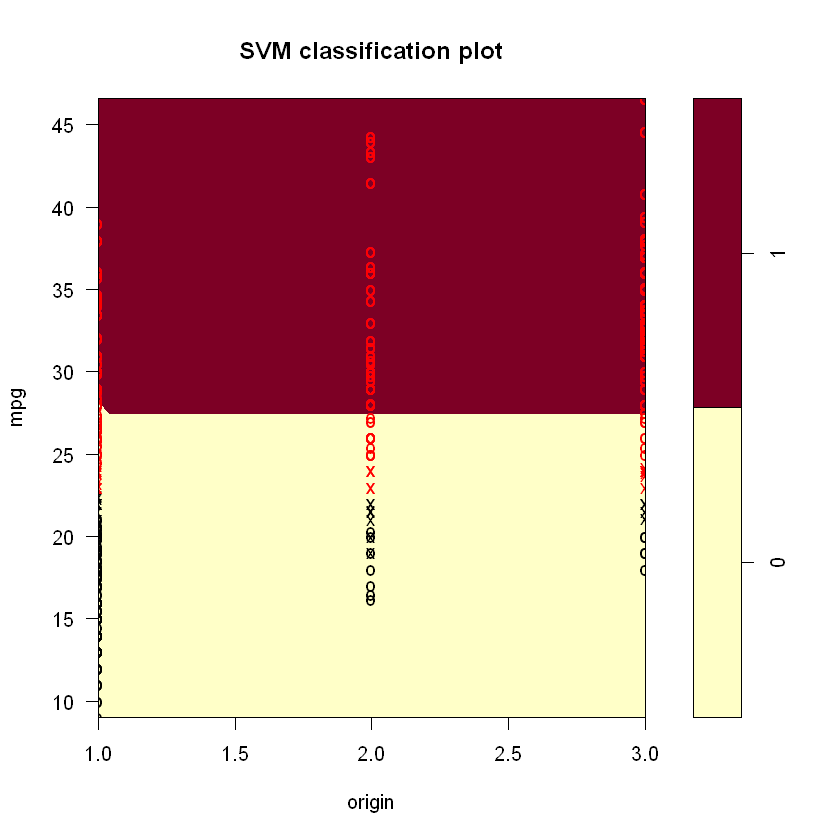

In [41]:
svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, 
    degree = 2)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

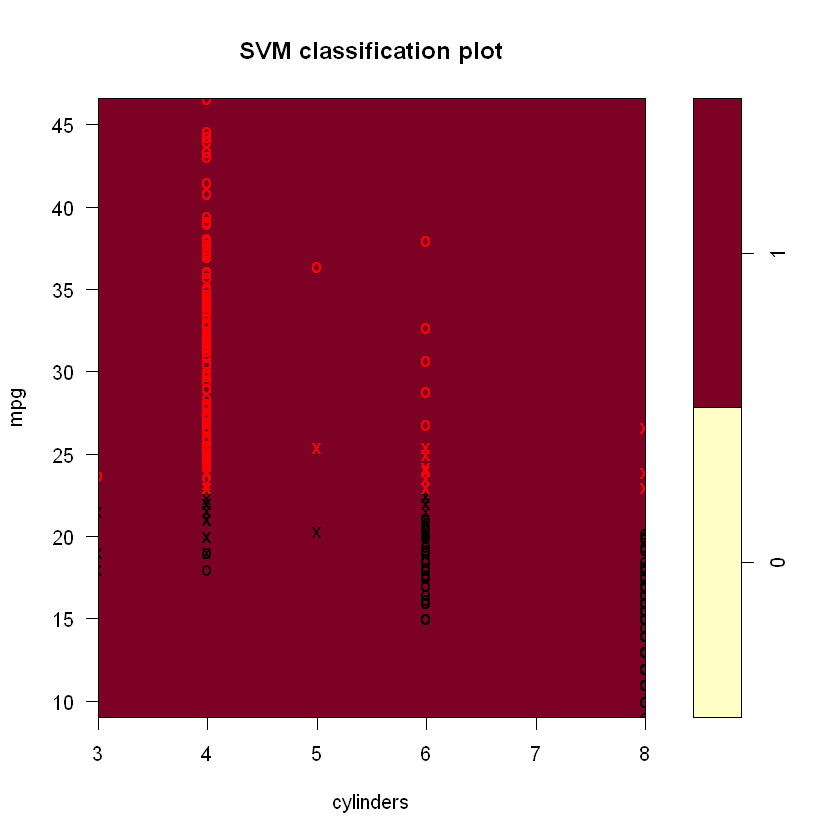

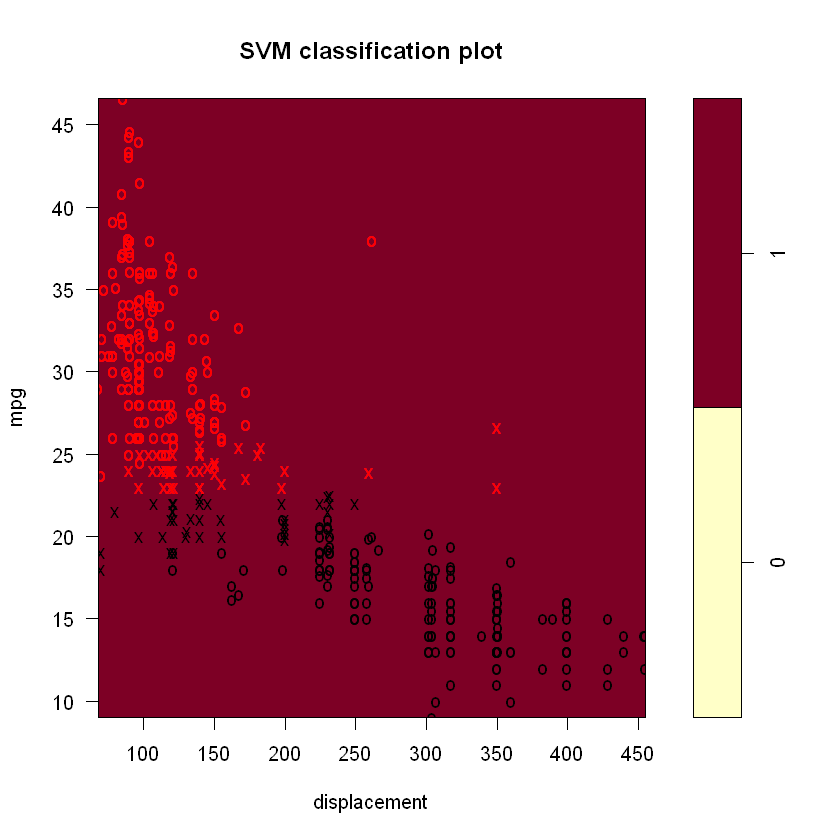

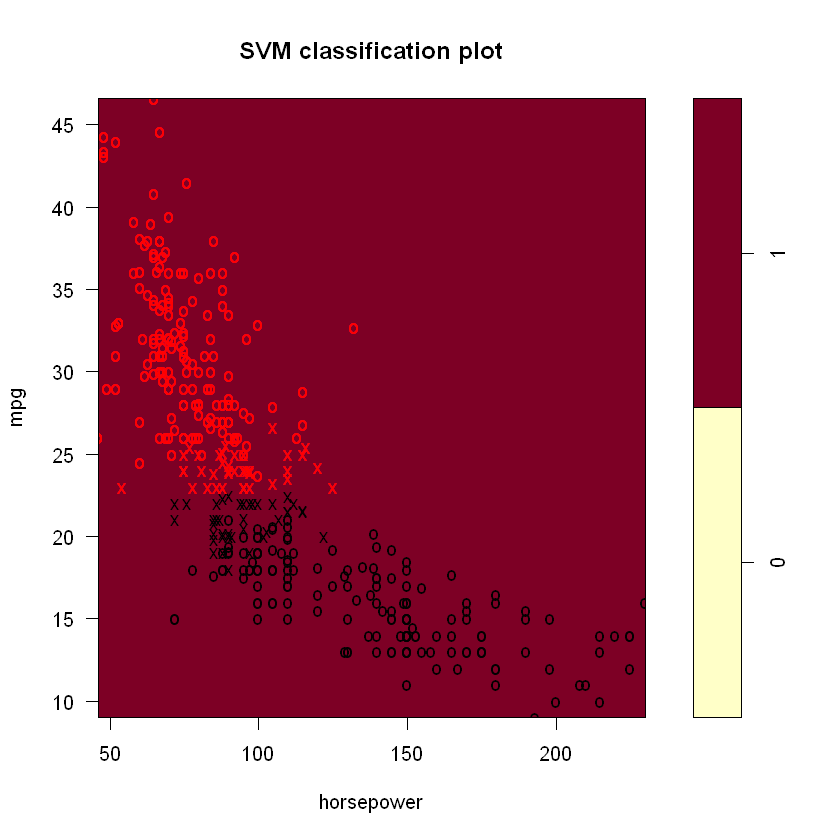

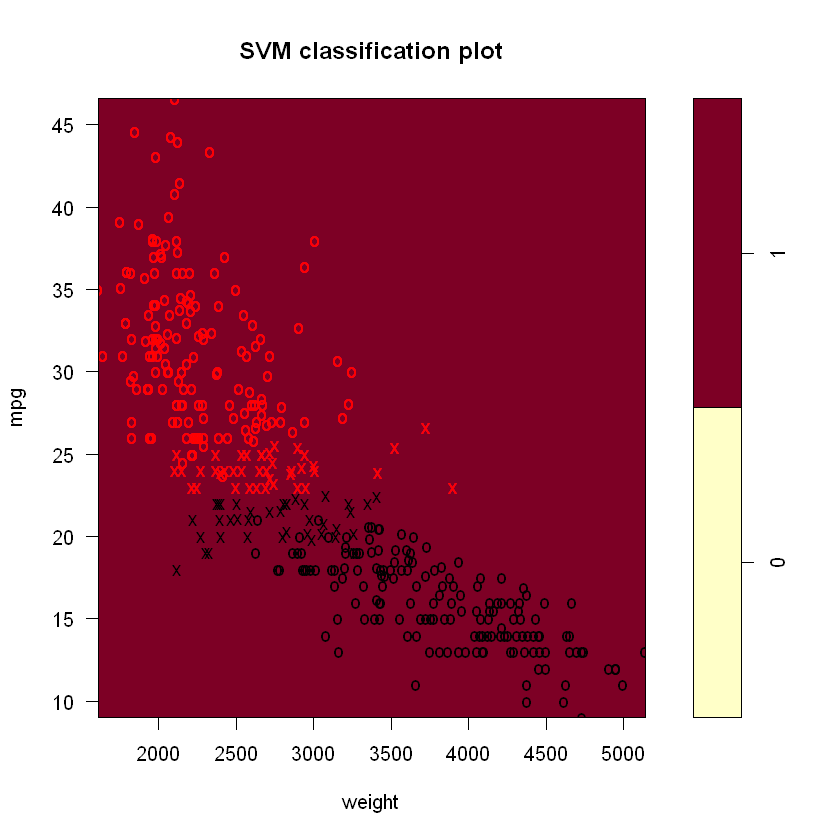

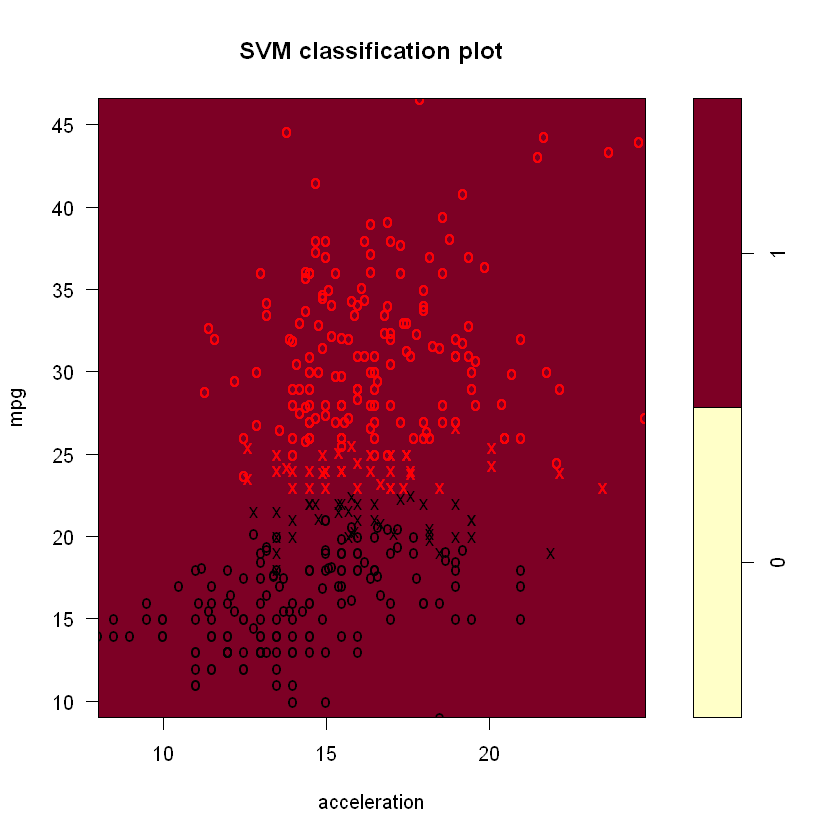

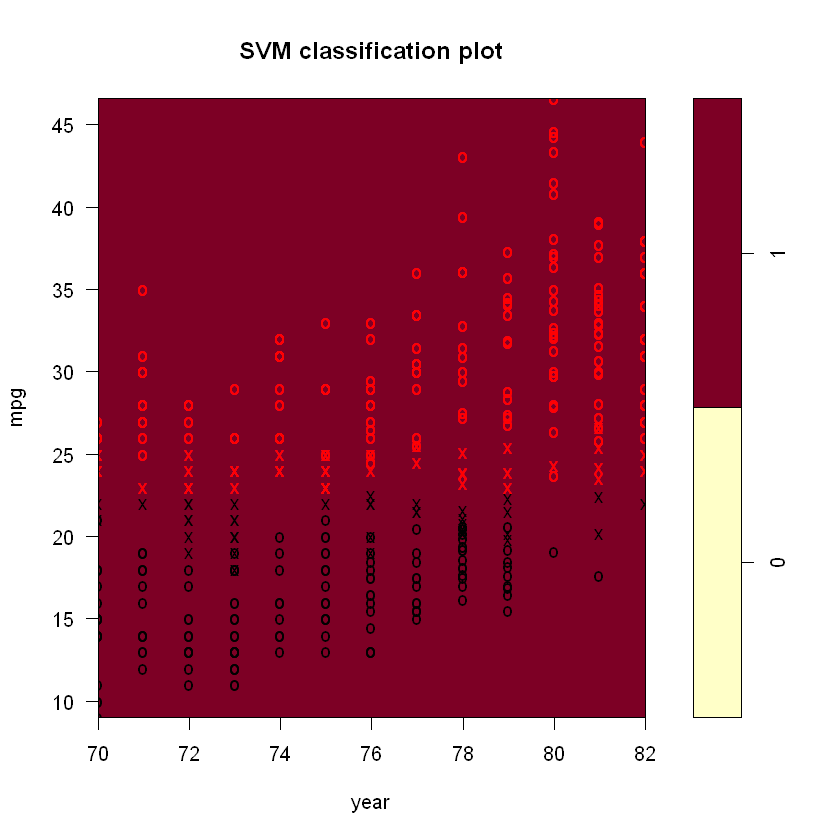

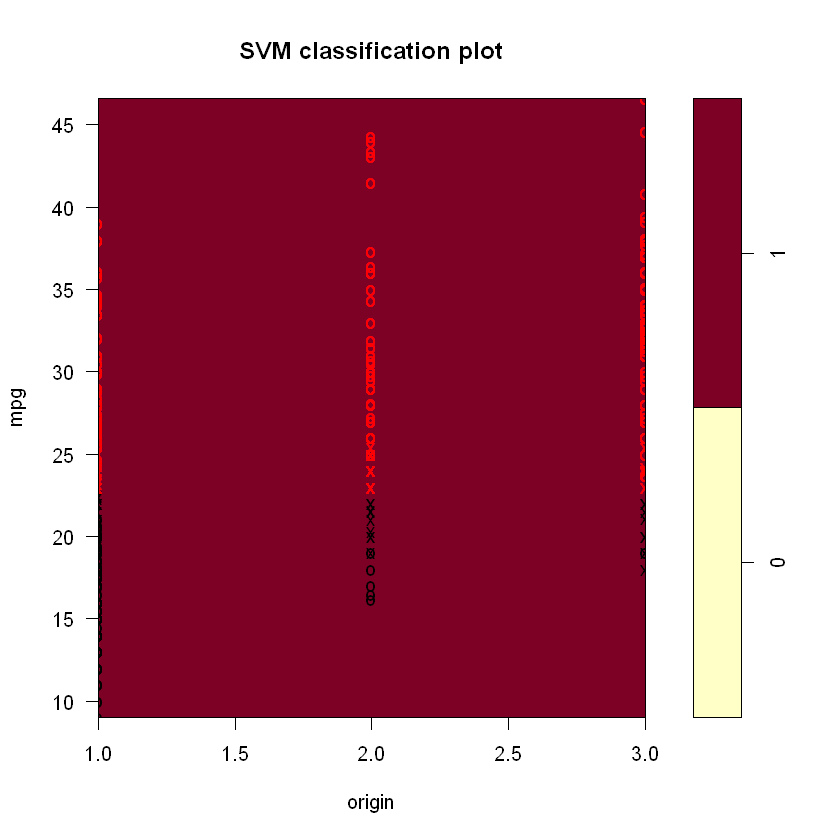

In [42]:
plotpairs(svm.radial)

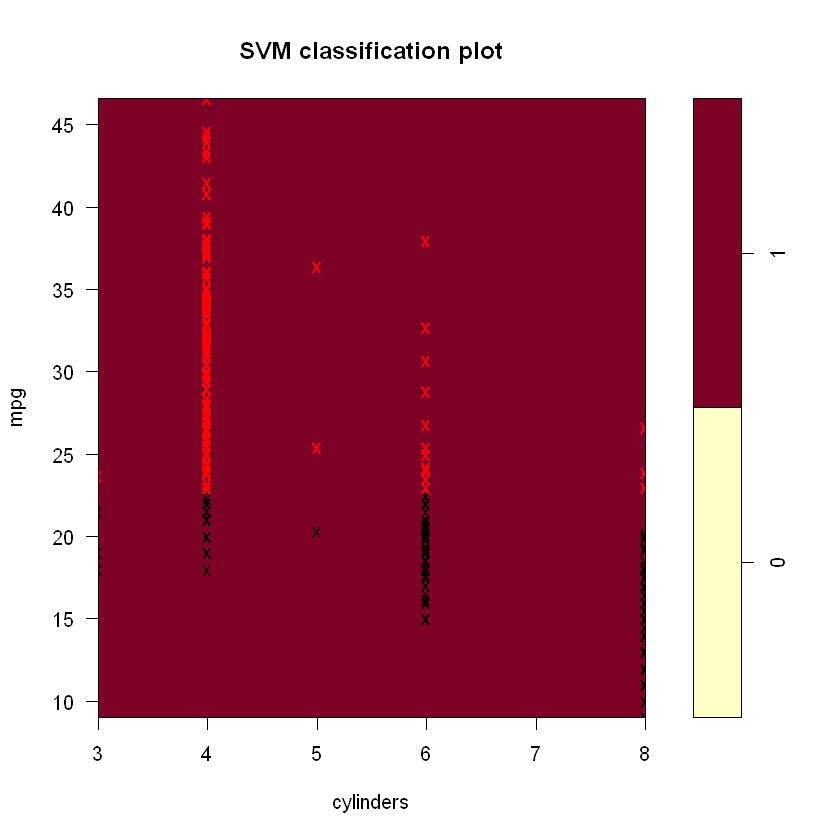

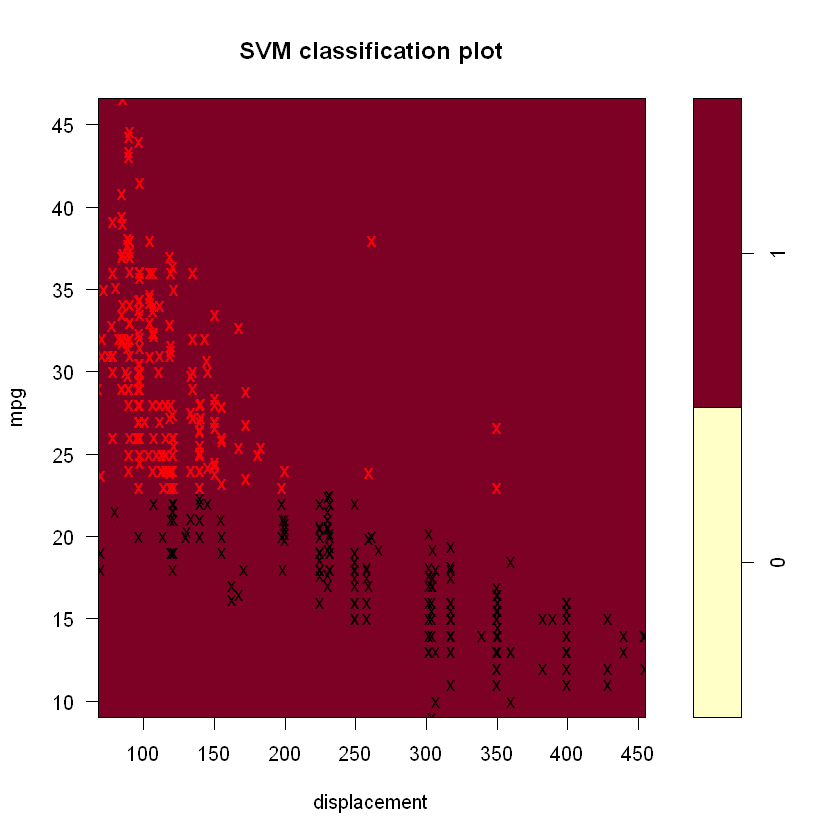

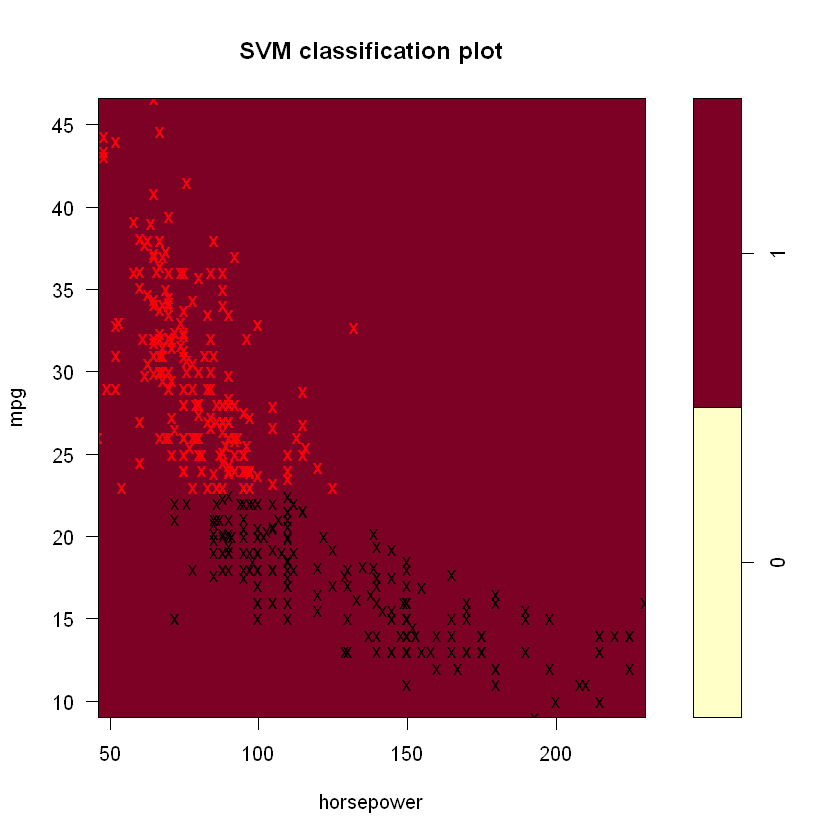

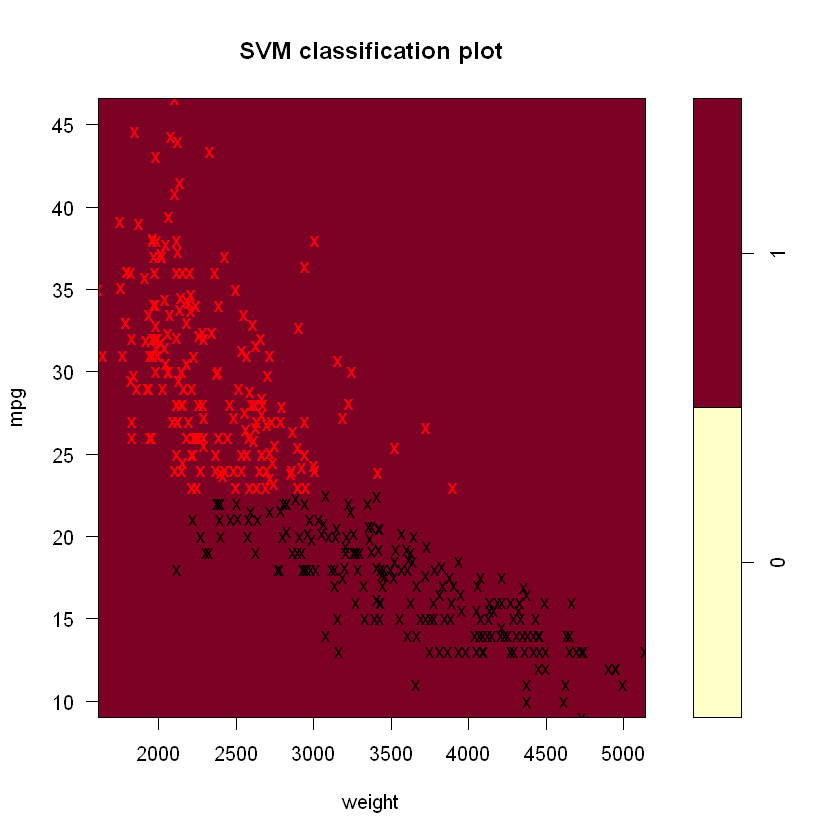

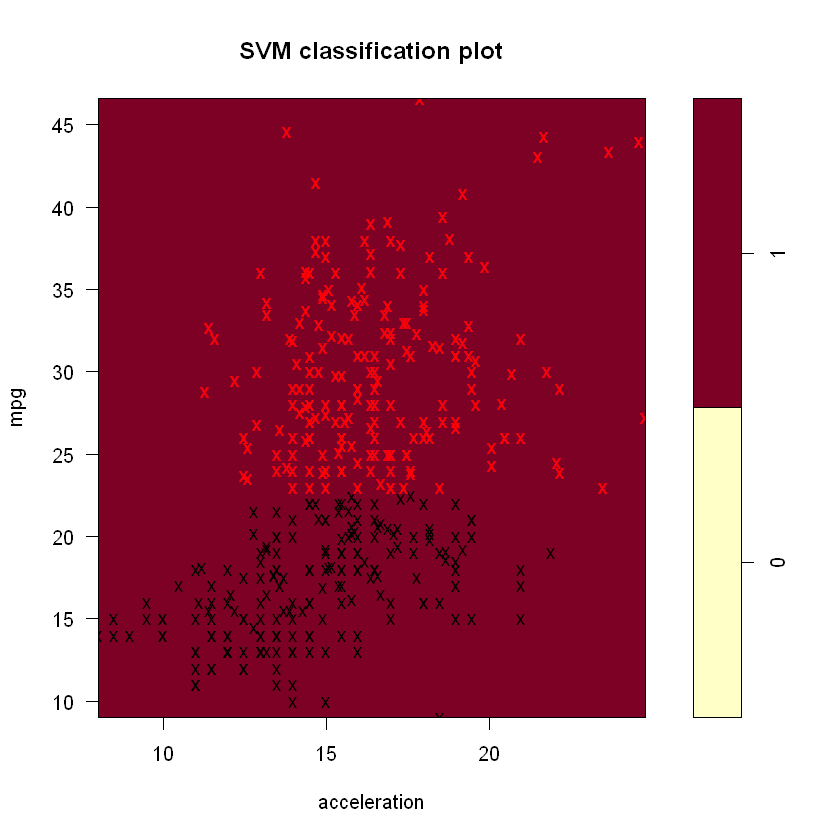

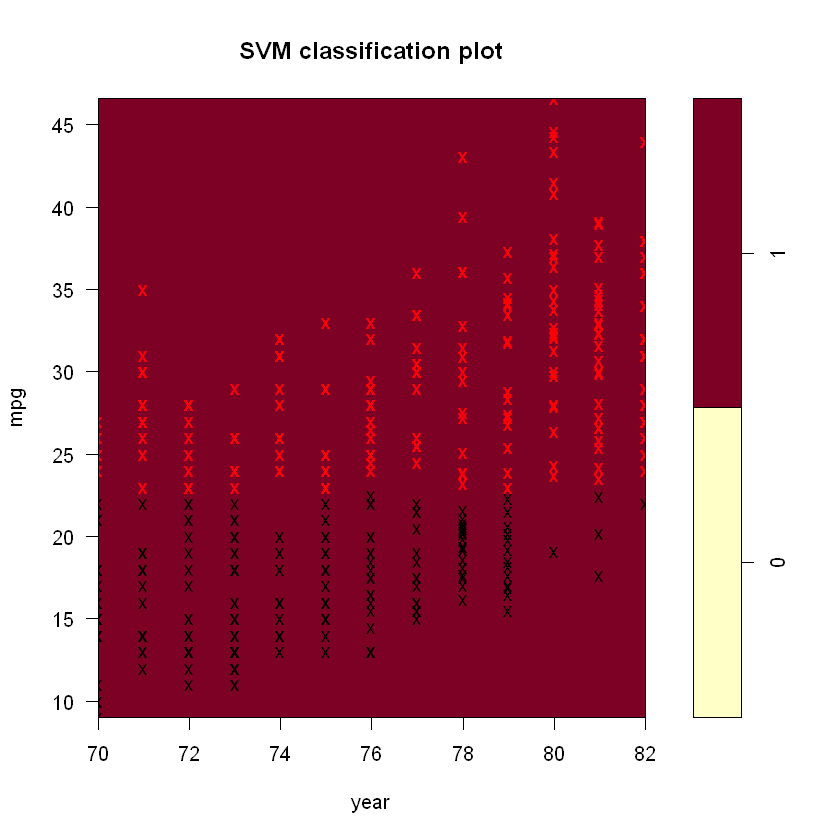

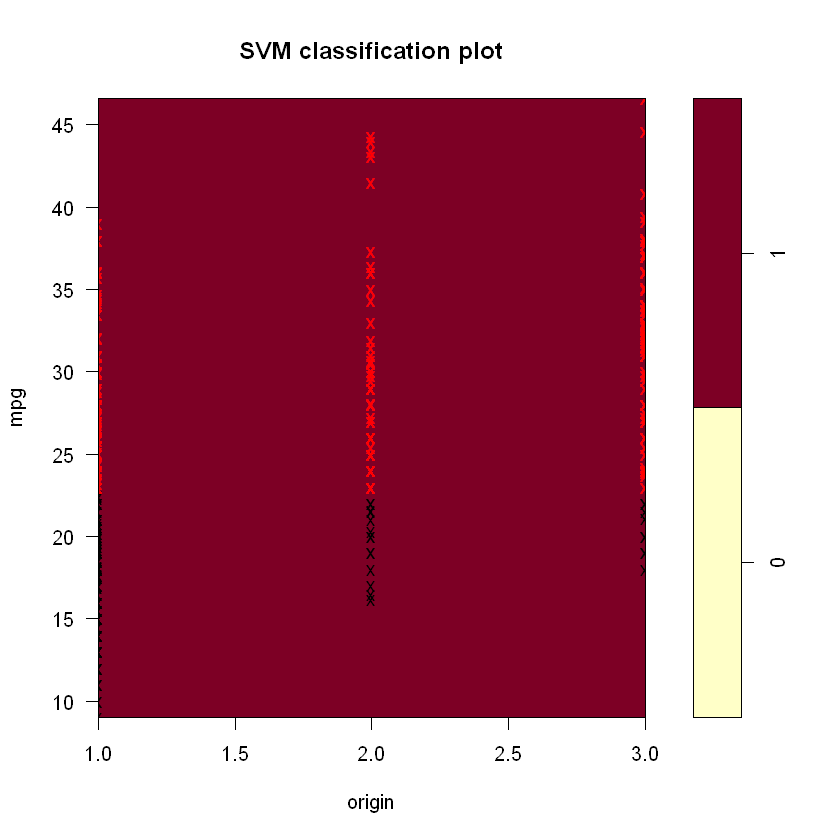

In [43]:
plotpairs(svm.poly)

# Exercise8

In [7]:
library(ISLR)
head(OJ)

Warning message:
"package 'ISLR' was built under R version 3.6.2"

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [18]:
library(ISLR)
set.seed(1000)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [19]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 222 220 )


Number of Classes:  2 

Levels: 
 CH MM




In [20]:
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

#(82 + 53)/(439 + 53 + 82 + 226)=0.1688

    train.pred
      CH  MM
  CH 432  51
  MM  80 237

In [21]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

#(19 + 29)/(142 + 19 + 29 + 80)= 0.1778

    test.pred
      CH  MM
  CH 146  24
  MM  22  78

In [25]:
set.seed(3)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.17125 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17250 0.03899786
2   0.01778279 0.17250 0.03809710
3   0.03162278 0.17250 0.03809710
4   0.05623413 0.17375 0.03839216
5   0.10000000 0.17125 0.03866254
6   0.17782794 0.17125 0.04450733
7   0.31622777 0.17250 0.04073969
8   0.56234133 0.17500 0.04124790
9   1.00000000 0.17500 0.03996526
10  1.77827941 0.17625 0.03972562
11  3.16227766 0.17250 0.04116363
12  5.62341325 0.17375 0.04387878
13 10.00000000 0.17625 0.04767147


In [26]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

#(57 + 71)/(435 + 57 + 71 + 237)=0.16

    train.pred
      CH  MM
  CH 424  59
  MM  72 245

In [27]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

#(29 + 20)/(141 + 20 + 29 + 80)=0.18

    test.pred
      CH  MM
  CH 145  25
  MM  21  79

In [28]:
set.seed(410)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  371

 ( 188 183 )


Number of Classes:  2 

Levels: 
 CH MM




In [29]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

#(40 + 78)/(452 + 40 + 78 + 230)=0.1475

    train.pred
      CH  MM
  CH 441  42
  MM  74 243

In [30]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

#(27 + 15)/(146 + 15 + 27 + 82)=0.1556

    test.pred
      CH  MM
  CH 148  22
  MM  27  73

In [31]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

#(77 + 40)/(452 + 40 + 77 + 231)=0.1462

    train.pred
      CH  MM
  CH 437  46
  MM  88 229

In [32]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

#(28 + 15)/(146 + 15 + 28 + 81)=0.1593

    test.pred
      CH  MM
  CH 147  23
  MM  30  70